In [66]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib as mlp
import pandas as pd
import numpy as np
import seaborn as sns

In [67]:
SHEET_ID = '1BH_B_Df_7e2l6AH8_8a0aK70nlAJXfCTwfyCgxkL5C8'
SHEET_NAME = 'cdr.fyi_raw'
url = f'https://docs.google.com/spreadsheets/d/{SHEET_ID}/gviz/tq?tqx=out:csv&sheet={SHEET_NAME}'
cdr_fyi = pd.read_csv(url, decimal=",")

In [68]:
cdr_fyi["Total price (USD)"].replace(0.0, np.NaN, inplace=True)
cdr_fyi["Price per Ton"] = cdr_fyi["Total price (USD)"] / cdr_fyi["Tons Purchased"]
cdr_fyi["Announcement Date"] = cdr_fyi["Announcement Date"].str.split(" ", n=1).str[0]
cdr_fyi

,Announcement Date,Announcement Link,Demand-side Marketplace,Supply-side Marketplace,CDR Method,Total price (USD),Purchaser,Status,Supplier,Tons Delivered,Tons Purchased,Price per Ton
0,2021-04-13,https://charmindustrial.com/order?orderId=rec9...,NaN,NaN,Biooil,NaN,Cosora,delivered,Charm Industrial,1.000000,1.000000,NaN
1,2022-04-08,https://registry.puro.earth/carbon-sequestration,Pledge,Puro,Biochar,NaN,Orkestro,delivered,Bussme,0.999999,0.999999,NaN
2,2021-06-30,https://charmindustrial.com/order?orderId=recW...,NaN,Carbon Removed,Biooil,NaN,Aggregate Purchase,delivered,Charm Industrial,2.000000,2.000000,NaN
3,2022-01-17,https://registry.puro.earth/carbon-sequestration,NaN,Puro,Biochar,NaN,Swiss Re,delivered,Hjelmsäters Egendom,11.999989,11.999989,NaN
4,2022-12-19,https://registry.puro.earth/carbon-sequestrati...,NaN,Puro,Biochar,4290.0,Blackrock,delivered,Freres Biochar,39.000000,39.000000,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...
982,2023-04-04,https://docs.google.com/spreadsheets/d/1yz9AG2...,Patch,Carbonfuture,Biochar,1000.0,Aggregate Purchase (Supplier Report),delivered,NovoCarbo,5.000000,5.000000,200.0
983,2023-05-24,https://charmindustrial.com/order?orderId=recU...,NaN,NaN,Biooil,600000.0,Shopify,partial,Charm Industrial,123.327000,1000.000000,600.0
984,2022-01-11,https://registry.puro.earth/carbon-sequestration,Pledge,Puro,Biochar,NaN,Checkout,delivered,Oregon Biochar Solutions,149.999865,149.999865,NaN
985,2023-03-27,supercritical report,NaN,Supercritical,Enhanced Weathering,NaN,Trafalgar House Penseions Administration Limited,undelivered,UNDO,0.000000,2.000000,NaN


In [69]:
cdr_fyi[cdr_fyi["Purchaser"] == "AquaGreen"]

,Announcement Date,Announcement Link,Demand-side Marketplace,Supply-side Marketplace,CDR Method,Total price (USD),Purchaser,Status,Supplier,Tons Delivered,Tons Purchased,Price per Ton
681,2021-06-28,https://registry.puro.earth/carbon-sequestration,NaN,Puro,Biochar,NaN,AquaGreen,delivered,Carbofex,4.999995,4.999995,NaN


In [70]:
print(cdr_fyi['Supplier'].nunique())
cdr_fyi.groupby(["Supplier"]).sum("Tons Delivered").sort_values("Tons Delivered", ascending=False).head(10)

77


,Total price (USD),Tons Delivered,Tons Purchased,Price per Ton
Supplier,,,,
Wakefield Biochar,3000.00,20934.000000,34450.000000,200.000000
Douglas County Forest Products,490531.00,11403.001295,13148.001295,2356.213788
Aggregate Supplier (Marketplace Report),1000000.00,8881.890000,203010.890000,inf
Aperam BioEnergia,118400.00,7300.000000,7300.000000,148.000000
Freres Biochar,161977.00,7092.996923,15655.104173,757.344437
Charm Industrial,76700912.29,6116.324400,162248.695000,NaN
Oregon Biochar Solutions,255485.00,4098.997384,6506.182384,185.000000
Carbofex,1685092.00,3975.997829,8047.308829,2950.008825
GreenSand,119071.00,2228.000000,3154.000000,973.180000


In [71]:
cdr_fyi.groupby(["Supplier"]).sum("Tons Delivered").sort_values("Tons Delivered", ascending=False).head(10)

,Total price (USD),Tons Delivered,Tons Purchased,Price per Ton
Supplier,,,,
Wakefield Biochar,3000.00,20934.000000,34450.000000,200.000000
Douglas County Forest Products,490531.00,11403.001295,13148.001295,2356.213788
Aggregate Supplier (Marketplace Report),1000000.00,8881.890000,203010.890000,inf
Aperam BioEnergia,118400.00,7300.000000,7300.000000,148.000000
Freres Biochar,161977.00,7092.996923,15655.104173,757.344437
Charm Industrial,76700912.29,6116.324400,162248.695000,NaN
Oregon Biochar Solutions,255485.00,4098.997384,6506.182384,185.000000
Carbofex,1685092.00,3975.997829,8047.308829,2950.008825
GreenSand,119071.00,2228.000000,3154.000000,973.180000


In [72]:
# create a list of all suppliers
suppliers = cdr_fyi['Supplier'].unique().tolist()
suppliers

['Charm Industrial',
 'Bussme',
 'Hjelmsäters Egendom',
 'Freres Biochar',
 'Carbon Engineering',
 'Aggregate Supplier (Marketplace Report)',
 'Oregon Biochar Solutions ',
 'Climeworks',
 'Carbofex',
 'UNDO',
 'Silicate',
 'Karbon Capture',
 'Douglas County Forest Products',
 'Jeffries Group',
 'Cedar Carbon',
 'Premier Forest',
 'Running Tide',
 'Wakefield Biochar',
 'Nordgau',
 'Pyrocal',
 'Mash makes',
 'Oplandske Bio, Rudshøgda',
 'CarbonBuilt',
 'Captura',
 ' Ørsted ',
 'NovoCarbo',
 'Neustark',
 'V-Grid Energy Systems',
 'Echo2',
 'CarbonCure',
 'Carbonfuture',
 'Noya',
 'Heirloom',
 'Inplanet',
 'CO280',
 'GreenSand',
 'Terra Fertilis',
 'Carbon Cycle',
 'Bio Restorative Ideas',
 'Planboo',
 'Lithos',
 'InterEarth',
 'Arbor',
 'Ecoera',
 'Kodama Systems',
 'Cella',
 nan,
 'Carbo Culture',
 '1PointFive',
 'Husk',
 'Aperam BioEnergia',
 'Carbon Capture',
 'Sustaera ',
 'Project Vesta',
 'Emergent Waste Solution',
 'RepAir',
 'Carbin Minerals',
 'AspiraDAC',
 'Equatic',
 'Gekka Bio

In [73]:
# sort this list by how "tons Delivered"
suppliers.sort(key=lambda x: cdr_fyi[cdr_fyi['Supplier'] == x]['Tons Delivered'].sum(), reverse=True)
suppliers

['Wakefield Biochar',
 'Douglas County Forest Products',
 'Aggregate Supplier (Marketplace Report)',
 'Aperam BioEnergia',
 'Freres Biochar',
 'Charm Industrial',
 'Oregon Biochar Solutions ',
 'Carbofex',
 'GreenSand',
 'NovoCarbo',
 'Carbon Cycle',
 'Pacific Biochar',
 'Echo2',
 'Bussme',
 'Ecoera',
 'Nordgau',
 'Hjelmsäters Egendom',
 'Oplandske Bio, Rudshøgda',
 'Terra Fertilis',
 'Premier Forest',
 'Planboo',
 'Netzero',
 'V-Grid Energy Systems',
 'Karbon Capture',
 'UNDO',
 'Emergent Waste Solution',
 'Jeffries Group',
 'Gekka Biochar',
 'Pyrocal',
 'Carbon Engineering',
 'Climeworks',
 'Silicate',
 'Cedar Carbon',
 'Running Tide',
 'Mash makes',
 'CarbonBuilt',
 'Captura',
 ' Ørsted ',
 'Neustark',
 'CarbonCure',
 'Carbonfuture',
 'Noya',
 'Heirloom',
 'Inplanet',
 'CO280',
 'Bio Restorative Ideas',
 'Lithos',
 'InterEarth',
 'Arbor',
 'Kodama Systems',
 'Cella',
 nan,
 'Carbo Culture',
 '1PointFive',
 'Husk',
 'Carbon Capture',
 'Sustaera ',
 'Project Vesta',
 'RepAir',
 'Carbi

In [47]:
suppliers.sort(key=lambda x: cdr_fyi[cdr_fyi['Supplier'] == x]['Tons Delivered'].sum(), reverse=True)
suppliers

['Wakefield Biochar',
 'Douglas County Forest Products',
 'Aggregate Supplier (Marketplace Report)',
 'Aperam BioEnergia',
 'Freres Biochar',
 'Charm Industrial',
 'Oregon Biochar Solutions ',
 'Carbofex',
 'GreenSand',
 'NovoCarbo',
 'Carbon Cycle',
 'Pacific Biochar',
 'Echo2',
 'Bussme',
 'Ecoera',
 'Nordgau',
 'Hjelmsäters Egendom',
 'Oplandske Bio, Rudshøgda',
 'Terra Fertilis',
 'Premier Forest',
 'Planboo',
 'Netzero',
 'V-Grid Energy Systems',
 'Karbon Capture',
 'UNDO',
 'Emergent Waste Solution',
 'Jeffries Group',
 'Gekka Biochar',
 'Pyrocal',
 'Carbon Engineering',
 'Climeworks',
 'Silicate',
 'Cedar Carbon',
 'Running Tide',
 'Mash makes',
 'CarbonBuilt',
 'Captura',
 ' Ørsted ',
 'Neustark',
 'CarbonCure',
 'Carbonfuture',
 'Noya',
 'Heirloom',
 'Inplanet',
 'CO280',
 'Bio Restorative Ideas',
 'Lithos',
 'InterEarth',
 'Arbor',
 'Kodama Systems',
 'Cella',
 nan,
 'Carbo Culture',
 '1PointFive',
 'Husk',
 'Carbon Capture',
 'Sustaera ',
 'Project Vesta',
 'RepAir',
 'Carbi

In [48]:
top_20_suppliers_d = cdr_fyi.groupby(["Supplier"]).sum("Tons Delivered").sort_values("Tons Delivered", ascending=False).head(20)
top_20_suppliers_d['Tons Delivered'].sum() / cdr_fyi['Tons Delivered'].sum()

0.989799257802192

In [49]:
8881.890000 / cdr_fyi['Tons Delivered'].sum()

0.10584279738971125

In [50]:
supplier_dict = {' Ørsted ': 'Denmark',
                 'Drax': 'United Kingdom',
                 'CO280': 'Canada',
                 '1PointFive': 'United States',
                 'Aggregate Supplier (Marketplace Report)': 'Other',
                 'Charm Industrial': 'United States',
                 'Climeworks': 'Switzerland',
                 'Equatic': 'United States',
                 'Mash makes': 'India',
                 'Carbon Capture': 'United States',
                 'Neustark': 'Switzerland',
                 'Wakefield Biochar': 'United States',
                 'Running Tide': 'United States',
                 'Carbonfuture': 'Germany',
                 'Freres Biochar': 'United States',
                 'Douglas County Forest Products': 'United States',
                 'Carbon Engineering': 'Canada',
                 'UNDO': 'United Kingdom',
                 'InterEarth': 'Australia',
                 'Carbofex': 'Finland',
                 'Carbo Culture': 'Finland',
                 'CarbonCure': 'Canada',
                 'Aperam BioEnergia': 'Brazil',
                 'Oregon Biochar Solutions ': 'United States',
                 'Echo2': 'Australia',
                 'CarbonBuilt': 'Other',
                 'Sustaera ': 'Other',
                 '44.01.00': 'Other',
                 'Husk': 'Other',
                 'Carbon Cycle': 'United States',
                 'Project Vesta': 'Other',
                 'GreenSand': 'Denmark',
                 'Pacific Biochar': 'United States',
                 'Cella': 'Other',
                 'NovoCarbo': 'Germany',
                 'Noya': 'Other',
                 'Carbon To Stone': 'Other',
                 'Bio Restorative Ideas': 'Other',
                 'Ecoera': 'Sweden',
                 'Inplanet': 'Other',
                 'Climate Robotics Inc.': 'Other',
                 'Arbor': 'Other',
                 'Silicate': 'Other',
                 'Bussme': 'Sweden',
                 'Nordgau': 'Germany',
                 'Heirloom': 'Other',
                 'Planetary': 'Other',
                 'Mission Zero': 'Other',
                 'Hjelmsäters Egendom': 'Sweden',
                 'Lithos': 'Other',
                 'Oplandske Bio, Rudshøgda': 'Norway',
                 'CREW': 'Other',
                 'Carbin Minerals': 'Other',
                 'Captura': 'Other',
                 'AspiraDAC': 'Other',
                 'Eion': 'Other',
                 'Kodama Systems': 'Other',
                 'V-Grid Energy Systems': 'Other',
                 'Seachange': 'Other',
                 'Travertine': 'Other',
                 'Terra Fertilis': 'France',
                 'Calcite-Origen': 'Other',
                 'Auen Pflege Dienst APD Flaach': 'Other',
                 'Ebb': 'Other',
                 'Premier Forest': 'United Kingdom',
                 'Planboo': 'Other',
                 'RepAir': 'Other',
                 'Sonnenerde': 'Other',
                 'Netzero': 'Other',
                 'Karbon Capture': 'Other',
                 'Emergent Waste Solution': 'Other',
                 'Jeffries Group': 'Other',
                 'Gekka Biochar': 'Other',
                 'Pyrocal': 'Other',
                 'Biokol.se': 'Other',
                 'Cedar Carbon': 'Other',
                 np.nan: 'Other',
                 'Summit Carbon Solutions': 'Other'}

In [51]:
# count many keys in the dictionary do not have the value other
len([k for k, v in supplier_dict.items() if v != "Other"])

35

In [52]:
# create a new column in the dataframe with the supplier_dict
cdr_fyi['Supplier Origin'] = cdr_fyi['Supplier'].map(supplier_dict)
print(cdr_fyi[['Supplier', 'Supplier Origin']])

                      Supplier Supplier Origin
0             Charm Industrial   United States
1                       Bussme          Sweden
2             Charm Industrial   United States
3          Hjelmsäters Egendom          Sweden
4               Freres Biochar   United States
..                         ...             ...
982                  NovoCarbo         Germany
983           Charm Industrial   United States
984  Oregon Biochar Solutions    United States
985                       UNDO  United Kingdom
986           Charm Industrial   United States

[987 rows x 2 columns]


In [53]:
og = cdr_fyi.groupby(["Supplier Origin"]).sum("Tons Delivered").sort_values("Tons Delivered", ascending=False)
og = og[["Tons Delivered", "Tons Purchased"]].reset_index()
og

,Supplier Origin,Tons Delivered,Tons Purchased
0,United States,52927.293518,7.729628e+05
1,Other,9650.894115,2.471626e+05
2,Brazil,7300.000000,7.300000e+03
3,Finland,3975.997829,1.593531e+04
4,Germany,2767.704408,2.121862e+04
5,Sweden,2450.999502,2.691000e+03
6,Denmark,2228.000000,2.763154e+06
7,Australia,1409.999784,1.503062e+04
8,Norway,630.356496,6.353565e+02
9,United Kingdom,293.687635,2.011126e+06


In [54]:
print(og["Tons Purchased"].sum()) 
print(cdr_fyi['Tons Purchased'].sum())

print(og["Tons Delivered"].sum()) 
print(cdr_fyi['Tons Delivered'].sum())

6510752.057601096
6510752.057601096
83915.8659733552
83915.8659733552


In [55]:
deliverd_all = cdr_fyi.groupby(["Supplier"]).sum("Tons Delivered").sort_values("Tons Delivered", ascending=False)
deliverd_all.reset_index(inplace=True)
deliverd_all['Supplier Origin'] = deliverd_all['Supplier'].map(supplier_dict)
deliverd_all[deliverd_all["Tons Delivered"] > 0][["Supplier", "Tons Delivered", "Tons Purchased", "Supplier Origin"]]

,Supplier,Tons Delivered,Tons Purchased,Supplier Origin
0,Wakefield Biochar,20934.000000,34450.000000,United States
1,Douglas County Forest Products,11403.001295,13148.001295,United States
2,Aggregate Supplier (Marketplace Report),8881.890000,203010.890000,Other
3,Aperam BioEnergia,7300.000000,7300.000000,Brazil
4,Freres Biochar,7092.996923,15655.104173,United States
5,Charm Industrial,6116.324400,162248.695000,United States
6,Oregon Biochar Solutions,4098.997384,6506.182384,United States
7,Carbofex,3975.997829,8047.308829,Finland
8,GreenSand,2228.000000,3154.000000,Denmark
9,NovoCarbo,1986.809946,1986.809855,Germany


In [56]:
cdr_fyi['Supplier Origin'] = cdr_fyi['Supplier'].map(supplier_dict)
cdr_fyi[['Supplier', 'Supplier Origin']]

,Supplier,Supplier Origin
0,Charm Industrial,United States
1,Bussme,Sweden
2,Charm Industrial,United States
3,Hjelmsäters Egendom,Sweden
4,Freres Biochar,United States
...,...,...
982,NovoCarbo,Germany
983,Charm Industrial,United States
984,Oregon Biochar Solutions,United States
985,UNDO,United Kingdom


# Tons Delivered

In [57]:
ogd = og.sort_values("Tons Delivered", ascending=False)[["Supplier Origin", "Tons Delivered"]]
ogd

,Supplier Origin,Tons Delivered
0,United States,52927.293518
1,Other,9650.894115
2,Brazil,7300.000000
3,Finland,3975.997829
4,Germany,2767.704408
5,Sweden,2450.999502
6,Denmark,2228.000000
7,Australia,1409.999784
8,Norway,630.356496
9,United Kingdom,293.687635


In [58]:
# drop the rows equal to zero
ogd = ogd[ogd["Tons Delivered"] != 0]

C:\Users\ffr\AppData\Local\Temp\ipykernel_23772\961564606.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'Finland'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Sweden'),
  Text(6, 0, 'Denmark'),
  Text(7, 0, 'Australia'),
  Text(8, 0, 'Norway'),
  Text(9, 0, 'United Kingdom'),
  Text(10, 0, 'France')])

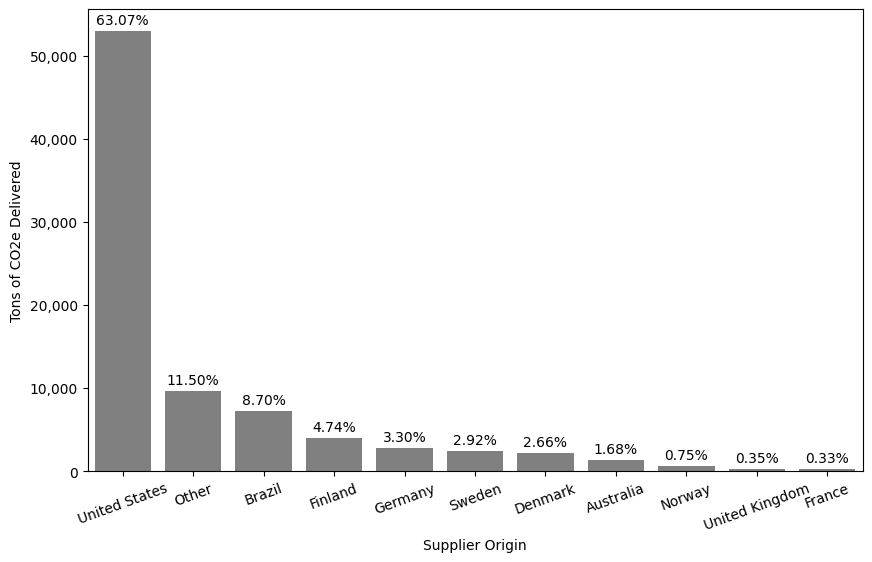

In [59]:
from matplotlib.ticker import FuncFormatter

ogd['Percentage'] = (ogd['Tons Delivered'] / ogd['Tons Delivered'].sum()) * 100

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Supplier Origin', y='Tons Delivered', data=ogd, color='grey')
    

for i, p in enumerate(barplot.patches):
    height = p.get_height()
    barplot.text(p.get_x()+p.get_width()/2.,
            height + 800,
            '{:1.2f}%'.format(ogd['Percentage'][i]),
            ha="center")
    
barplot.set_ylabel('Tons of CO2e Delivered')
    

y_labels = barplot.get_yticks()
barplot.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
    
plt.xticks(rotation=20)

In [60]:
import plotly.graph_objects as go

# Calculate percentages
ogd['Percentage'] = (ogd['Tons Delivered'] / ogd['Tons Delivered'].sum()) * 100

# Create bar chart
fig = go.Figure(data=go.Bar(
    x=ogd['Supplier Origin'], 
    y=ogd['Tons Delivered'], 
    text=ogd['Percentage'].round(2).apply(lambda x: '{:,.2f}%'.format(x)),  # Add percentage annotations
    textposition='outside', 
    marker_color='grey'
))

# Set figure size, y-axis label, and y-axis tick format
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    yaxis=dict(
        title_text="Tons of CO2e Delivered",
        tickformat=",",  # Add comma separators
    ),
    title="Tons of Biochar CO2e Delivered per Country"
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=20)

fig.show()

C:\Users\ffr\AppData\Local\Temp\ipykernel_23772\3301153232.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
# find the row where supplier origin is equal to "Denmark"
ogd["percentage"] = ogd["Tons Delivered"] / ogd['Tons Delivered'].sum()
ogd

C:\Users\ffr\AppData\Local\Temp\ipykernel_23772\372807995.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Supplier Origin,Tons Delivered,Percentage,percentage
0,United States,52927.293518,63.071855,0.630719
1,Other,9650.894115,11.500679,0.115007
2,Brazil,7300.000000,8.699189,0.086992
3,Finland,3975.997829,4.738076,0.047381
4,Germany,2767.704408,3.298190,0.032982
5,Sweden,2450.999502,2.920782,0.029208
6,Denmark,2228.000000,2.655040,0.026550
7,Australia,1409.999784,1.680254,0.016803
8,Norway,630.356496,0.751177,0.007512
9,United Kingdom,293.687635,0.349979,0.003500


In [62]:
ogd["Tons Delivered"].sum()

83915.8659733552

In [63]:
ogd = og.sort_values("Tons Delivered", ascending=False)
# Calculate total tons delivered
total_tons = ogd['Tons Delivered'].sum()

# Create a new column that represents the percentage of the total
ogd['Percentage'] = 100 * ogd['Tons Delivered'] / total_tons
# Update 'Supplier Origin' and 'Tons delivered' for rows that represent less than 1% of the total
ogd.loc[ogd['Percentage'] < 1, 'Supplier Origin'] = 'Other'
ogd.loc[ogd['Supplier Origin'] == 'Other', 'Tons Delivered'] = ogd[ogd['Supplier Origin'] == 'Other']['Tons Delivered'].sum()

ogd = ogd.drop(columns=['Percentage'])
ogd = ogd.drop_duplicates(subset=['Supplier Origin']).reset_index(drop=True)
ogd

,Supplier Origin,Tons Delivered,Tons Purchased
0,United States,52927.293518,7.729628e+05
1,Other,10855.870934,2.471626e+05
2,Brazil,7300.000000,7.300000e+03
3,Finland,3975.997829,1.593531e+04
4,Germany,2767.704408,2.121862e+04
5,Sweden,2450.999502,2.691000e+03
6,Denmark,2228.000000,2.763154e+06
7,Australia,1409.999784,1.503062e+04


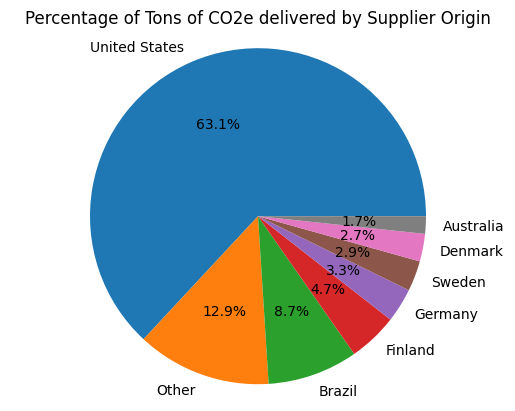

In [64]:
labels = ogd["Supplier Origin"]
sizes = ogd["Tons Delivered"]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Percentage of Tons of CO2e delivered by Supplier Origin")

plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Brazil'),
  Text(3, 0, 'Finland'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Sweden'),
  Text(6, 0, 'Denmark'),
  Text(7, 0, 'Australia')])

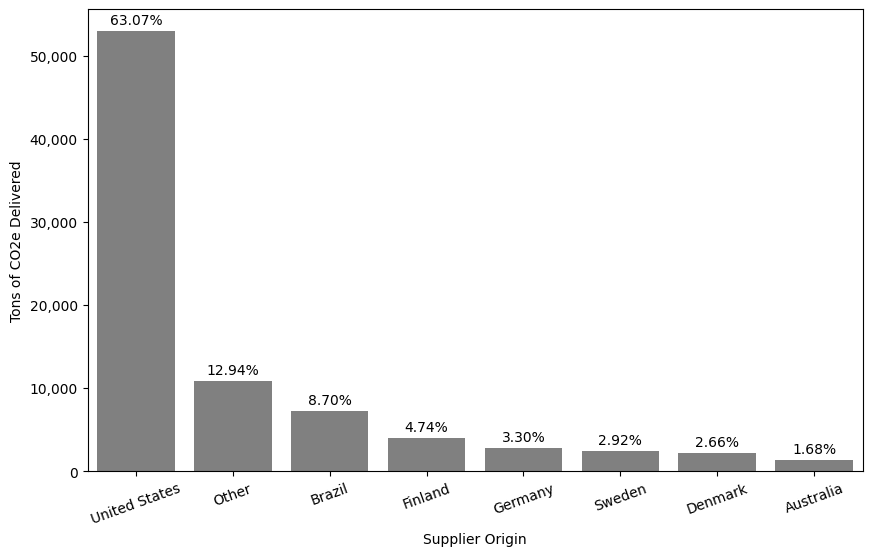

In [65]:
from matplotlib.ticker import FuncFormatter

ogd['Percentage'] = (ogd['Tons Delivered'] / ogd['Tons Delivered'].sum()) * 100

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Supplier Origin', y='Tons Delivered', data=ogd, color='grey')
    

for i, p in enumerate(barplot.patches):
    height = p.get_height()
    barplot.text(p.get_x()+p.get_width()/2.,
            height + 800,
            '{:1.2f}%'.format(ogd['Percentage'][i]),
            ha="center")
    
barplot.set_ylabel('Tons of CO2e Delivered')
    

y_labels = barplot.get_yticks()
barplot.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
    
plt.xticks(rotation=20)